In [15]:
import keras
import tensorflow as tf
import numpy
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# NOTE: In model.summary(), None in output shapes stands for batch size (specified later in model.fit())
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,198,721 (4.57 MB)

 Trainable params: 1,198,721 (4.57 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# download MNIST digits dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)
assert x_test.shape == (10000, 28, 28)
assert y_test.shape == (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


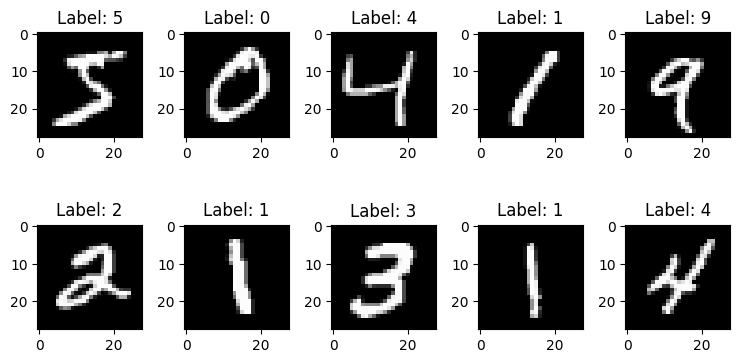

In [10]:
# visualize digits from MNIST dataset: https://github.com/MrDataScience/tutorials/blob/master/Data/MNIST/How%20To%20Plot%20MNIST%20Digits%20Using%20Matplotlib.ipynb
num = 10   # plot 10 images
images = x_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [23]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.fit(x_train, y_train, epochs=10, batch_size=128,
          validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.1132 - loss: 0.0000e+00 - val_accuracy: 0.1135 - val_loss: 0.0000e+00
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1111 - loss: 0.0000e+00 - val_accuracy: 0.1135 - val_loss: 0.0000e+00
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1141 - loss: 0.0000e+00 - val_accuracy: 0.1135 - val_loss: 0.0000e+00
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1123 - loss: 0.0000e+00 - val_accuracy: 0.1135 - val_loss: 0.0000e+00
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1128 - loss: 0.0000e+00 - val_accuracy: 0.1135 - val_loss: 0.0000e+00
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1127 - loss: 0.0000e+00 - val_accuracy: 0.1135 - val_loss: 0.0000e+00
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1125 - loss: 0.0000e+00 - val_accuracy: 0.1135 - val_loss: 0.0000e+00
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc

### TODO
- [ ] Training plot (train loss, validation loss)
- [ ] Test with new digits data & get metrics (accuracy, etc.)
- [ ] [Augment digit dataset](https://github.com/MrDataScience/tutorials/blob/master/Data/MNIST/How%20To%20Augment%20the%20MNIST%20Dataset%20Using%20Tensorflow.ipynb) & check how much it improves accuracy
- [ ] Visualize convolution layers
- [ ] Check model size in memory (it's size is a bit larger in memory than on disk)

In [30]:
model.save('/content/digit_classifier_model.keras')